## Scrapping the tweets between 5th of December - 11st of December

Uncoment below line to re-scrap

In [45]:
# import twint
# import nest_asyncio

# nest_asyncio.apply()

# c = twint.Config()
# c.Username = "collegemenfess"
# c.Since = "2022-12-05"
# c.Until = "2022-12-11"
# c.Store_csv = True
# c.Output = "collegemenfess.csv"
# c.Limit = 5000
# c.Pandas = True

# twint.run.Search(c)

In [46]:
import pandas as pd
import numpy as np

df = pd.read_csv("collegemenfess.csv")

df.head()

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1603569991151804417,1603569991151804417,2022-12-16 08:57:33 WIB,2022-12-16,08:57:33,700,1046084008742801408,collegemenfess,COLLE | CEK PINNED😎,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
1,1603569910097285120,1603569910097285120,2022-12-16 08:57:14 WIB,2022-12-16,08:57:14,700,1046084008742801408,collegemenfess,COLLE | CEK PINNED😎,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
2,1603569275658448896,1603569275658448896,2022-12-16 08:54:42 WIB,2022-12-16,08:54:42,700,1046084008742801408,collegemenfess,COLLE | CEK PINNED😎,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
3,1603569076390924289,1603569076390924289,2022-12-16 08:53:55 WIB,2022-12-16,08:53:55,700,1046084008742801408,collegemenfess,COLLE | CEK PINNED😎,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
4,1603568860145528832,1603568860145528832,2022-12-16 08:53:03 WIB,2022-12-16,08:53:03,700,1046084008742801408,collegemenfess,COLLE | CEK PINNED😎,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN


In [47]:
# remove other column except tweet

df = df[['tweet']]
df['real_tweet'] = df['tweet']

df.head()

,tweet,real_tweet
0,[cm] smt 5 mending ikut studi independen dulu ...,[cm] smt 5 mending ikut studi independen dulu ...
1,[cm] di kampus kalian mahasiswa s1 wajib publi...,[cm] di kampus kalian mahasiswa s1 wajib publi...
2,[cm] Bisa gk yh tugas UAS ini ngerjain dirinya...,[cm] Bisa gk yh tugas UAS ini ngerjain dirinya...
3,[CM] Dosen praktikum aku ngasih ini waktu pert...,[CM] Dosen praktikum aku ngasih ini waktu pert...
4,[cm] Alhamdulilah masih bisa hidup walaupun di...,[cm] Alhamdulilah masih bisa hidup walaupun di...


In [48]:
import re
def cleanTxt(text):
    text = re.sub(r'\[cm\]|\[CM\]|\[Cm\]|\[cM\]', '', text)
    text = re.sub(r'@\w+|#\w+', '', text) #Removing @mentions
    text = re.sub('#', '', text) # Removing '#' hash tag
    text = re.sub('RT[\s]+', '', text) # Removing RT
    text = re.sub('\w+:\/\/\S+', '', text) # Removing hyperlink
    text = re.sub('[^a-zA-Z]', ' ', text)
    # lower case
    text = text.lower()
    return text

In [49]:
# Clean the tweets
df['tweet'] = df['tweet'].apply(cleanTxt)

df.head()

,tweet,real_tweet
0,smt mending ikut studi independen dulu apa ...,[cm] smt 5 mending ikut studi independen dulu ...
1,di kampus kalian mahasiswa s wajib publish j...,[cm] di kampus kalian mahasiswa s1 wajib publi...
2,bisa gk yh tugas uas ini ngerjain dirinya sen...,[cm] Bisa gk yh tugas UAS ini ngerjain dirinya...
3,dosen praktikum aku ngasih ini waktu pertemua...,[CM] Dosen praktikum aku ngasih ini waktu pert...
4,alhamdulilah masih bisa hidup walaupun dikasi...,[cm] Alhamdulilah masih bisa hidup walaupun di...


In [50]:
# tokenization
import nltk
from nltk.tokenize import word_tokenize
df['tweet'] = df['tweet'].apply(word_tokenize)

df.head()

,tweet,real_tweet
0,"[smt, mending, ikut, studi, independen, dulu, ...",[cm] smt 5 mending ikut studi independen dulu ...
1,"[di, kampus, kalian, mahasiswa, s, wajib, publ...",[cm] di kampus kalian mahasiswa s1 wajib publi...
2,"[bisa, gk, yh, tugas, uas, ini, ngerjain, diri...",[cm] Bisa gk yh tugas UAS ini ngerjain dirinya...
3,"[dosen, praktikum, aku, ngasih, ini, waktu, pe...",[CM] Dosen praktikum aku ngasih ini waktu pert...
4,"[alhamdulilah, masih, bisa, hidup, walaupun, d...",[cm] Alhamdulilah masih bisa hidup walaupun di...


In [51]:
# stemming using sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()
df['tweet'] = df['tweet'].apply(lambda x: [stemmer.stem(y) for y in x])
df.head()

,tweet,real_tweet
0,"[smt, mending, ikut, studi, independen, dulu, ...",[cm] smt 5 mending ikut studi independen dulu ...
1,"[di, kampus, kalian, mahasiswa, s, wajib, publ...",[cm] di kampus kalian mahasiswa s1 wajib publi...
2,"[bisa, gk, yh, tugas, uas, ini, ngerjain, diri...",[cm] Bisa gk yh tugas UAS ini ngerjain dirinya...
3,"[dosen, praktikum, aku, ngasih, ini, waktu, te...",[CM] Dosen praktikum aku ngasih ini waktu pert...
4,"[alhamdulilah, masih, bisa, hidup, walaupun, k...",[cm] Alhamdulilah masih bisa hidup walaupun di...


In [52]:
# remove stopword
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
factory = StopWordRemoverFactory()
stopword = factory.create_stop_word_remover()
df['tweet'] = df['tweet'].apply(lambda x: [stopword.remove(y) for y in x])
df.head()


,tweet,real_tweet
0,"[smt, mending, , studi, independen, , , magang...",[cm] smt 5 mending ikut studi independen dulu ...
1,"[, kampus, , mahasiswa, , wajib, publish, jurn...",[cm] di kampus kalian mahasiswa s1 wajib publi...
2,"[, gk, yh, tugas, uas, , ngerjain, , , gausah,...",[cm] Bisa gk yh tugas UAS ini ngerjain dirinya...
3,"[dosen, praktikum, , ngasih, , waktu, temu, ke...",[CM] Dosen praktikum aku ngasih ini waktu pert...
4,"[alhamdulilah, , , hidup, , kasi, , include, k...",[cm] Alhamdulilah masih bisa hidup walaupun di...


In [53]:
# remove empty list
df['tweet'] = df['tweet'].apply(lambda x: [y for y in x if y != ''])
df.head()


,tweet,real_tweet
0,"[smt, mending, studi, independen, magang, yaa,...",[cm] smt 5 mending ikut studi independen dulu ...
1,"[kampus, mahasiswa, wajib, publish, jurnal, in...",[cm] di kampus kalian mahasiswa s1 wajib publi...
2,"[gk, yh, tugas, uas, ngerjain, gausah, manja, ...",[cm] Bisa gk yh tugas UAS ini ngerjain dirinya...
3,"[dosen, praktikum, ngasih, waktu, temu, kelas,...",[CM] Dosen praktikum aku ngasih ini waktu pert...
4,"[alhamdulilah, hidup, kasi, include, kos, kuli...",[cm] Alhamdulilah masih bisa hidup walaupun di...


In [54]:
# rejoin tweet into new column 
df['token'] = df['tweet']
df['tweet'] = df['tweet'].apply(lambda x: ' '.join(x))
df.head()

,tweet,real_tweet,token
0,smt mending studi independen magang yaa semest...,[cm] smt 5 mending ikut studi independen dulu ...,"[smt, mending, studi, independen, magang, yaa,..."
1,kampus mahasiswa wajib publish jurnal indeks s...,[cm] di kampus kalian mahasiswa s1 wajib publi...,"[kampus, mahasiswa, wajib, publish, jurnal, in..."
2,gk yh tugas uas ngerjain gausah manja utk bant...,[cm] Bisa gk yh tugas UAS ini ngerjain dirinya...,"[gk, yh, tugas, uas, ngerjain, gausah, manja, ..."
3,dosen praktikum ngasih waktu temu kelas haru b...,[CM] Dosen praktikum aku ngasih ini waktu pert...,"[dosen, praktikum, ngasih, waktu, temu, kelas,..."
4,alhamdulilah hidup kasi include kos kuliah jkt,[cm] Alhamdulilah masih bisa hidup walaupun di...,"[alhamdulilah, hidup, kasi, include, kos, kuli..."


In [55]:
# Vectorization
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
tfidf.fit(df['tweet'])
tfidf_matrix = tfidf.transform(df['tweet'])
tfidf_matrix.shape


(9860, 11543)

In [56]:
# Cosine Similarity
from sklearn.metrics.pairwise import cosine_similarity
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)
cosine_sim.shape

print(cosine_sim)

[[1.         0.10736582 0.         ... 0.         0.         0.02599982]
 [0.10736582 1.         0.         ... 0.01430879 0.         0.03314385]
 [0.         0.         1.         ... 0.         0.06083603 0.        ]
 ...
 [0.         0.01430879 0.         ... 1.         0.05282103 0.        ]
 [0.         0.         0.06083603 ... 0.05282103 1.         0.        ]
 [0.02599982 0.03314385 0.         ... 0.         0.         1.        ]]


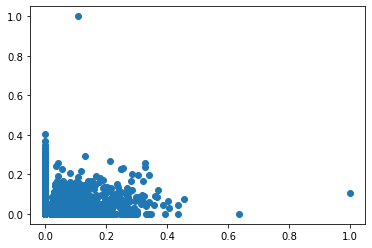

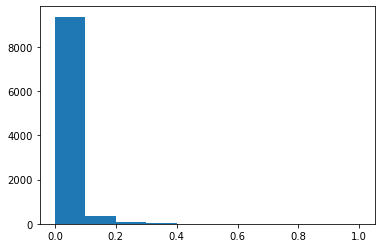

In [57]:
# plot scatter plot
import matplotlib.pyplot as plt
plt.scatter(cosine_sim[:,0], cosine_sim[:,1])
plt.show()

# plot histogram
plt.hist(cosine_sim[:,0])
plt.show()


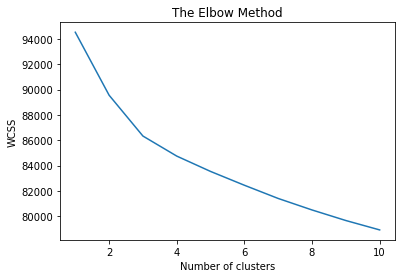

In [58]:
# elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++',
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(cosine_sim)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [59]:
# kmeans
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0).fit(cosine_sim)
kmeans.labels_

#input label to dataframe
df['label'] = kmeans.labels_
df.head()





,tweet,real_tweet,token,label
0,smt mending studi independen magang yaa semest...,[cm] smt 5 mending ikut studi independen dulu ...,"[smt, mending, studi, independen, magang, yaa,...",2
1,kampus mahasiswa wajib publish jurnal indeks s...,[cm] di kampus kalian mahasiswa s1 wajib publi...,"[kampus, mahasiswa, wajib, publish, jurnal, in...",2
2,gk yh tugas uas ngerjain gausah manja utk bant...,[cm] Bisa gk yh tugas UAS ini ngerjain dirinya...,"[gk, yh, tugas, uas, ngerjain, gausah, manja, ...",0
3,dosen praktikum ngasih waktu temu kelas haru b...,[CM] Dosen praktikum aku ngasih ini waktu pert...,"[dosen, praktikum, ngasih, waktu, temu, kelas,...",0
4,alhamdulilah hidup kasi include kos kuliah jkt,[cm] Alhamdulilah masih bisa hidup walaupun di...,"[alhamdulilah, hidup, kasi, include, kos, kuli...",0


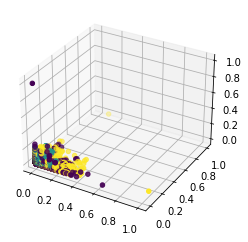

In [60]:

# plot scatter plot to 3d plot
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(cosine_sim[:,0], cosine_sim[:,1], cosine_sim[:,2], c=kmeans.labels_)
plt.show()